In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
from wordcloud import WordCloud




In [2]:
data = pd.read_csv('data_fakenews/train.csv')

In [3]:
def cleandf(df):
    return df.drop(df[df.text.apply(lambda x: type(x) == float)].index)

In [4]:
preprocess = data.drop(data[data.text.apply(lambda x: type(x) == float)].index)

In [5]:
#cleaner = cleandf(data)

In [6]:
#preprocess

In [7]:
stack = pd.read_csv('data_fakenews/test.csv')

In [8]:
concat = pd.read_csv('data_fakenews/submit.csv')

In [9]:
#concat.isnull().any()

In [10]:
#len(stack)

In [11]:
#len(concat)

In [12]:
batch2 = pd.concat([stack, concat], axis=1)

In [13]:
#batch2.isnull().any()

In [14]:
#thirdversion = pd.concat([preprocess, batch2], ignore_index=True)

In [15]:
#third1 = df1.loc[~df1.index.duplicated(keep='first')]

In [16]:
preprocess2 = batch2.drop(batch2[batch2.text.apply(lambda x: type(x) == float)].index)

In [17]:
preprocess2.isnull().any()

id        False
title      True
author     True
text      False
id        False
label     False
dtype: bool

In [18]:
notsurea = preprocess.reset_index()
notsureb = preprocess2.reset_index()

In [19]:
firsthalf = notsurea[['text', 'label']]

In [20]:
firsthalf.isnull().any()

text     False
label    False
dtype: bool

In [21]:
secondhalf = notsureb[['text', 'label']]

In [22]:
secondhalf.isnull().any()

text     False
label    False
dtype: bool

In [23]:
#fuck it

In [24]:
#type(firsthalf)

In [25]:
#type(secondhalf) ##DF##

In [26]:
articles = pd.concat([firsthalf,secondhalf],ignore_index=True)

In [27]:
articles

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
25949,Of all the dysfunctions that plague the world’...,0
25950,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1
25951,Good morning. (Want to get California Today by...,0
25952,« Previous - Next » 300 US Marines To Be Deplo...,1


In [28]:
#25954 rows × 2 columns

In [29]:
# from nltk.corpus import stopwords
# from wordcloud import WordCloud

# wordcloud = WordCloud(width = 800, height = 800, 
#                 background_color ='white', 
#                 stopwords = stopwords.words('english'), 
#                 min_font_size = 10).generate(" ".join(articles[articles['label'] == 0].text)) 
  
# # plot the word cloud for fake news data                      
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
# plt.show() 

In [30]:
# wordcloud2 = WordCloud(width = 800, height = 800, 
#                 background_color ='white', 
#                 stopwords = stopwords.words('english'), 
#                 min_font_size = 10).generate(" ".join(articles[articles['label'] == 1].text)) 
  
# # plot the WordCloud image for genuine news data                     
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud2) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
# plt.show()

In [31]:
import sklearn
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(articles['text'],articles['label'], test_size=0.2)

In [33]:
##MULTINOMIAL NAIEVE BAYES##

accuracy:   77.326


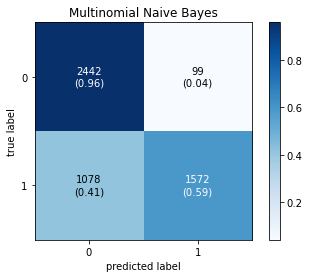

In [34]:
#Multinomial NB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title("Multinomial Naive Bayes")
plt.show()

In [34]:
# fakestory = '''Using his speech at the annual Human Rights Campaign dinner as an opportunity to air grievances, former Vice President Joe Biden railed against conservative segments of American society.

# “Despite losing in the courts and in the court of public opinion, these forces of intolerance remain determined to undermine and roll back the progress you all have made,” Biden said, alluding in particular to same-sex marriage and other LGBT causes. “This time they—not you—have an ally in the White House. They’re a small percentage of the American people, virulent people. Some of them are the dregs of society.”

# Given the backlash Hillary Clinton faced for labeling Trump supporters “deplorables,” it is unclear why Biden would go so far to replicate her mistake. This seems to point to a potential presidential candidate who is either unhinged or cynically attempting to exploit divisions among the American people. Biden is no friend of the Second Amendment, and freedom-loving Americans should be cautious about the kinds of moves he is making.'''



# anotherfake = '''House Democrats voted Thursday to fast-track an electronic medical records system that would serve illegal immigrants, something America’s veterans have been seeking for years.
# The House passed the bill on a largely party line vote of 230-184, American Military News reported.
# Only two Republican congressmen supported the bill — Brian Fitzpatrick of Pennsylvania and Fred Upton of Michigan.

# The proposal has yet to be considered by the Republican-controlled Senate.
# The Democratic proposal would require the Department of Homeland Security and U.S. Customs and Border Patrol to create a universally connected Electronic Health Records system which “can be accessed by all departmental components operating along the borders of the United States,” according to the bill.

# Part of that system’s job will be to provide information to Congress on the health of migrants who enter the country illegally, according to The Hill.
# The bill gives the DHS 90 days after the bill receives final approval to get the job done.

# In contrast, the Veterans Administration has been working for years to implement a similar EHR system for veterans.
# According to American Military News, veterans do have access to EHRs at individual care providers and facilities, however, their records are not universally connected. That means their records do not to follow them between community care providers, the VA and the DoD and are unable to be accessed electronically by other providers in the agency.

# “The modernized system will allow VA to have patient data shared seamlessly between VA and DoD,” a VA news release states.
# “As DHS works to improve its medical screening of children and migrants at the border to ensure there is a minimum standard of care, the need for proper record keeping on those screenings will only increase,” she said.
# Underwood said that the bill was based on her experiences touring America’s southern Border.

# “When I was at the border I saw busy, overworked Border Patrol officials having to keep health records on paper. I also saw how these records don’t follow migrants between facilities and transfers of custody,” she said.
# But critics wondered how adding more responsibilities to overworked Border Patrol officials would fix anything.

# “I oppose this bill because it is poorly conceived, erroneously drafted and extremely risky,” Republican Rep. Jim Banks of Indiana said.
# “This bill would require the Border Patrol to divert resources from its core missions and create a new medical screening for those who illegally cross and enter the country between ports of entry.”
# Republican Rep. Mark Walker of North Carolina said in a statement that the Democratic bill was wrong on multiple levels.
# “Earlier this week, I said impeachment was the House Democrats only agenda. I was mistaken. They just passed legislation that will give illegal immigrants better health care records than our veterans and servicemembers. More and more they are making their priorities clear and it’s absolutely shameful,” he said.

# Walker noted that Democrats want illegal immigrants to have universal electronic health records faster than they are available for veterans.
# “The Veterans Administration (VA) will not have similar electronic health records systems in place for nine years and the Department of Defense (DOD) will not have those systems for another five years,” he said.
# Tennessee Republican Rep. Tim Burchett said in a Twitter video that Republicans proposed an amendment to the Democratic bill to ensure veterans receive the same treatment as illegal immigrants under the bill.
# Democrats voted down that amendment, Burchett said.

# The amendment referenced by Burchett proposed the establishment date of the EHR system for immigrants be pushed back to Sept. 30, 2027 — 10 days after veteran’s interoperable EHR system would be fully operational within the VA.
# Republican Rep. Mark Green of Tennessee presented the motion to recommit H.R. 3525 with his amendment seeking to “ensure that our veterans get this service first.”


# Section 3 of Bill H.R. 3525 states that within 90 days of its enactment, DHS would “establish within the Department an electronic health record system that can be accessed by all departmental components operating along the borders of the United States for individuals in the custody of such components.”
# Meanwhile, an EHR system accessible between both the VA and the DoD is set to be implemented in some VA hospitals only as soon as 2020, and the full modernization effort, which officially began last May, was set to be rolled out over a decade, the Military Times reported.
# But there are other problems with the bill, Walker said.
# “Additionally, the new requirements are not funded, so DHS would be forced to take funds from other agency efforts including border security, combating terrorism, stopping drug and human trafficking, and natural disaster response,” he said.

# Republican Rep. Phil Roe of Tennessee agreed.
# “If we cannot deliver a modern medical record for the men and women who put their lives on the line for us sooner than that, it is impossible to think that we could or should deliver one …  for those who knowingly enter our country illegally,” Roe said in a statement.
# “We should not treat anyone, particularly someone who breaks our laws, better than we treat our heroes. DHS staff along the border are doing the best they can to keep up with screening illegal border crossers and this bill will make it harder for them to do their job without actually helping anyone,” he said.
# '''

In [35]:
# faketest = pd.Series(fakestory)
# faketest.iloc[0]
# fake2 = pd.Series(anotherfake)
# fake2.iloc[0]

In [ ]:
##TRYING TO MAKE A PREDICTION ON A NEW DATA ((using same training data))

#SVM
from sklearn.svm import LinearSVC

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(X_train, y_train)
prediction = model.predict(faketest)

print(prediction)

##Fail

In [ ]:
##TRYING TO MAKE A PREDICTION ON A NEW DATA ((using same training data))

#SVM

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(X_train, y_train)
prediction = model.predict(fake2)

print(prediction)

##Huzzah!!

In [ ]:
thirdfake = '''“Turnabout is fair play”, the old saying goes.The thing about old sayings, however, is that they’re old. Nobody in their right mind walks around shouting “23 Skidoo!” anymore.
That’s way too many Skidoos for Matt Gaetz anyway.
After season after season of trauma, with professional sports figures of color kneeling in protest during America’s pearly white people’s national anthem, now the fallout comes to pass.
Last week, during a practice game between the Atlanta Falcons and a group of professional outhouse builders, starting tight end Joe Barron chose to kneel down in protest during the playing of “Lift Every Voice and Sing”, known colloquially as “The Black National Anthem.” It’s unknown why “Boyz In Tha Hood” was not chosen for the honor.
The Caucasian was immediately labelled as a “racist” by onlookers, local news organizations, and his own teammates.  Barron explained that he was simply protesting white suffrage.
“All of a sudden, black people are taking over too many things. Captain America. Hockey. There’s even that country music song with rapping in it.  That is wrong.  We want America the way it used to be back when it was great. With separate water fountains and restaurants. Does that make me racist? If it does, then how come I got a boner when Halle Berry was topless in that ‘Swordfish’ movie?”
Barron’s supporters, overwhelmingly older Trump voting tard weebles, point out that it’s not offensive because people didn’t fight and sacrifice their lives for the song.  Which, they didn’t do for the other one, either. Who would die for a song? Oh yeah, half of Milli Vanilli.

Phil Collins told him over and over. “Milli. Milli, don’t you lose my number.”
When the season fully starts, is this likely to become a common occurrence?  Will pale faces be seen lined up, on their knees, like a Trump family cubicle at a Russian piss hooker bordello?  Perhaps.  But at least now everyone’s racist uncle can waddle off and watch football again during the holidays and just shut the f*ck up.'''

In [ ]:
fake3 = pd.Series(thirdfake)

fake3.iloc[0]

In [ ]:
##TRYING TO MAKE A PREDICTION ON A NEW DATA ((using same training data))

#SVM

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(X_train, y_train)
prediction = model.predict(fake3)

print(prediction)

#Fail


In [ ]:
fakefour = '''Trump Is Now Trying To Get Mike Pence Impeached
Jason EasleyWed, Sep 25th, 2019
During a press conference, Trump said that if he is going to be investigated, Vice President Pence’s phone calls with Ukraine should also be investigated.
According to the official White House transcript as provided to PolitcusUSA, Trump said:
the witch hunt continues, but they’re getting hit hard in this witch hunt, because when they look at the information, it’s a joke. Impeachment? For that? When you have a wonderful meeting, or you have a wonderful phone conversation?
I think you should ask. We actually — you know, that was the second conversation. I think you should ask for the first conversation also. I can’t believe they haven’t, although I heard there’s a — there’s a rumor out they want the first conversation. It was beautiful. It was just a perfect conversation.
But I think you should do that. I think you should do, and I think you should ask for VP Pence’s conversation because he had a couple conversations also. I can save you a lot of time. They’re all perfect. Nothing was mentioned of any import other than congratulations. But the word is that they’re going to ask for the first phone conversation. You can have it anytime you need it. And also Mike Pence’s conversations, which were, I think, one or two of them. They were perfect. They were all perfect.

There should be no doubt in anyone’s mind that Trump would throw Mike Pence under the bus in a second to save his presidency. Trump has made no secret of his desire to build a family political dynasty, and he sees his kids Don Jr. and Ivanka as next line after he leaves office. Trump has declined to endorse Pence, and at times, has even waffled on keeping Pence as his vice president.
Trump is looking to blame anyone, including people in his own administration to save his skin. Pence was always going to go down with the Trump ship.
But, he never thought that it would be Trump pushing him overboard.'''

fake4 = pd.Series(fakefour)

fake4.iloc[0]

In [ ]:
prediction = model.predict(fake4)

print(prediction)

#not good

In [ ]:
clearlyfake = '''Reminder: Trump's grandfather was a pimp and tax evader; his father a member of the KKK
Most families of enormous wealth have a dark and sometimes scandalous, even monstrous past. Donald Trump's clan is no exception to that rule. His grandfather was a pimp and a tax evader, his father a racist who would in the course of his life, clash with New York City Police as a member of the Ku Klux Klan and then as a wealthy real estate magnate, refuse to rent to people of color. 

Donald Trump's legacy is anything but a rag to riches story. His dad kicked the bucket with $250-$300 million in the bank. The man who wants to ban all people of a particular religion from travel wasn't born with a silver spoon in his mouth, his was white gold. The only thing more obnoxious than Donald Trump himself, is his family's money-grubbing, bigoted history. 

Trump's Grandfather: Pimp and Tax Evader 

Donald Trump's grandfather, Frederick or Friedrich Trump, made his money from operating a decadent restaurant and hotel during the Gold Rush at Klondike in the Yukon. 

"Trump made his first fortune operating boom-town hotels, restaurants and brothels", is more accurate, according to the CBC news report, "Donald Trump's grandfather ran Canadian brothel during gold rush, author says". Author Gwenda Blair simply wrote, "The bulk of the cash flow came from the sale of liquor and sex." 

Trump's grandfather was born in Germany, to parents who were employed by a vineyard. He moved to New York City in 1885 where he became a barber. After six years of this, Frederick Trump moved across the United States to Seattle, Washington, where he owned and operated what he referred to as a "decadent restaurant" that was actually called "Poodle Dog" in Seattle's red light district. Interestingly, the name and concept that had already been established in San Francisco. (He named his restaurant after a dog but would later make money selling horse meat) Around this time Frederick Trump became a US citizen. 

A Yukon Sun Newspaper writer described his business: "For single men the Arctic has excellent accommodations as well as the best restaurant in Bennett, but I would not advise respectable women to go there to sleep as they are liable to hear that which would be repugnant to their feelings – and uttered, too, by the depraved of their own sex".'''

fake5 = pd.Series(clearlyfake)
fake5.iloc[0]

In [ ]:
prediction = model.predict(fake5)

print(prediction)

#not good

accuracy:   88.403


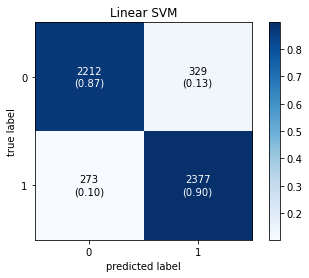

In [35]:
#SVM
from sklearn.svm import LinearSVC

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0, 1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                              colorbar=True)
plt.title("Linear SVM")
plt.show()

In [ ]:
onion1 = '''U.S. Responds To Rising Sea Levels By Patting East Coast With Towels. WASHINGTON—In an effort to combat the effects of climate change, federal authorities responded to rising sea levels by patting the East Coast with towels, sources confirmed Friday. “Now more than ever, it is important that we take action to protect our coastlines with ultra-absorbent linens,” said FEMA administrator Deanne Criswell, who confirmed that the agency had dispatched teams across the region to mitigate any potential damage by wadding up, rolling up, and spreading towels across its beaches. “We’re proud to unveil this as the greatest U.S. climate change initiative to date. Simply giving everything a good patting down will preserve and even create miles of coastlines that we didn’t previously have. Plus, feel—they’re super soft.” At press time, authorities were scrambling to respond to the crisis caused by the unprecedented concentrations of mildew in the air. 
'''

onion2 = '''Subway CEO Apologizes For Trusting Fish Who Falsified Documents To Pass As Tuna. MILFORD, CT—Addressing recent questions about the integrity of ingredients in one of the chain’s most popular sandwiches, Subway CEO John Chidsey issued a formal apology Thursday for trusting a fish who allegedly submitted false documents to the restaurant in order to pass as a tuna. “Subway has always prided itself on thoroughly vetting anyone who will represent our brand, but we failed you this time, placing our trust in what turned out to be a common carp,” said Chidsey, adding that while the fish in question went through several rounds of vigorous interviews before it was brought onto the team, its fraudulent credentials claiming membership in the Thunnus albacares species were never questioned. “Though we, too, are victims in this situation, ultimately the onus was on us to more closely examine this candidate’s purported background as a yellowfin tuna. In our defense, the paperwork was all there, we simply failed to do our due diligence and check this fish’s references. Perhaps if we had, we would not have been taken in by this duplicitous carp. We just got mixed up with the wrong fish, that’s all.” Chidsey went on to address allegations regarding the role the carp played in his personal life, acknowledging the two had carried on a consensual, extramarital affair during the fish’s brief tenure at the company.
'''

onion3 = '''Sweatshop Workers Stand In Line For Hours To Assemble New iPhone 13.'''

In [ ]:
onions = pd.Series(data=[onion1, onion2, onion3])

In [ ]:
onions

In [ ]:
prediction = model.predict(onions)

prediction

In [ ]:

#Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title("Passive Agressive Classifier")
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [ ]:
# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``


gs = GridSearchCV(MultinomialNB(),
                  param_grid={'param_grid': range(2, 403, 10)},
                  scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X_test, y_test)
results = gs.cv_results_

In [ ]:
gs.get_params().keys()

In [ ]:
##gridsearch isn't working but 88% is fine for now -- onto PCA! ##


In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
classifer = MultinomialNB()

#x_train = vectorizer.fit_transform(X_train)
#classifer.fit(x_train, y_train)

#svd = TruncatedSVD()
#data = svd.fit_transform(data) 

In [ ]:
## apparently my sklearn is "broken" fucking nonsense#

In [ ]:
#sklearn.show_versions()


In [ ]:
#conda remove scikit-learn


In [ ]:
#pip uninstall scikit-learn

In [ ]:
#conda install scikit-learn ##SEEMS TO BE WORKING NOW? BRB

In [ ]:
x_train

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD()
data = svd.fit_transform(X_train) 

In [ ]:
sklearn.__version__

In [ ]:
LinearSVC()

In [ ]:
# defining parameter range
param_grid = {'penalty' : ['l1', 'l2']
              } 
  
grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

In [ ]:
grid.best_params()

In [ ]:
x_train

In [ ]:
print(x_train)

In [ ]:
type(x_train)

In [ ]:
#matty gridsearch##

In [ ]:
{
'penalty'            : ['l1, l2'], 
'loss'               : ['hinge', 'squared_hinge'],
'dual'               : [True, False],
'C'                  : [np.around(np.linspace(0,1,10), 2)],
'std_test_score'     : [0.01, 0.10, 0.05, 0.08],
'rank_test_score'    : [2, 4, 3, 1],
'split0_train_score' : [0.80, 0.92, 0.70, 0.93],
'split1_train_score' : [0.82, 0.55, 0.70, 0.87],
'mean_train_score'   : [0.81, 0.74, 0.70, 0.90],
'std_train_score'    : [0.01, 0.19, 0.00, 0.03],
'mean_fit_time'      : [0.73, 0.63, 0.43, 0.49],
'std_fit_time'       : [0.01, 0.02, 0.01, 0.01],
'mean_score_time'    : [0.01, 0.06, 0.04, 0.04],
'std_score_time'     : [0.00, 0.00, 0.00, 0.01],
'params'             : [{'kernel': 'poly', 'degree': 2}, ...],
}

In [ ]:
np.around(np.linspace(0,1,10), 2)



In [ ]:
#SVM
#from sklearn.svm import LinearSVC

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC(loss='hinge'))
])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0, 1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                              colorbar=True)
plt.title("Linear SVM")
plt.show()

In [ ]:
#SVM
#from sklearn.svm import LinearSVC

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC(loss='hinge'))
])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0, 1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                              colorbar=True)
plt.title("Linear SVM")
plt.show()

In [ ]:
onions

In [ ]:
onion2

In [ ]:
# >>> from sklearn.feature_extraction.text import TfidfVectorizer
# >>> corpus = [
# ...     'This is the first document.',
# ...     'This document is the second document.',
# ...     'And this is the third one.',
# ...     'Is this the first document?',
# ... ]
# >>> vectorizer = TfidfVectorizer()
# >>> X = vectorizer.fit_transform(corpus)
# >>> print(vectorizer.get_feature_names())
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
# >>> print(X.shape)
# (4, 9)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
corpus = articles

In [36]:
vec = TfidfVectorizer()

In [37]:
PPP = vec.fit_transform(corpus['text'])

In [38]:
PPP

<25954x202969 sparse matrix of type '<class 'numpy.float64'>'
	with 8615798 stored elements in Compressed Sparse Row format>

In [39]:
vec.get_feature_names()

['00',
 '000',
 '0000',
 '000035',
 '0000364334',
 '0001',
 '00012',
 '0001pt',
 '0002',
 '000202',
 '000205',
 '0002062',
 '000billion',
 '000c',
 '000emails',
 '000ft',
 '000k',
 '000km',
 '000lb',
 '000m',
 '000mg',
 '000s',
 '000th',
 '000â',
 '001',
 '0011',
 '0012',
 '001219074822',
 '0013',
 '002',
 '0020143',
 '0023z',
 '0024',
 '003',
 '0036',
 '004',
 '004s',
 '005',
 '0054z',
 '0057',
 '005s',
 '006',
 '00684',
 '006s',
 '007',
 '007176',
 '007s',
 '008',
 '008s',
 '009',
 '0099',
 '00am',
 '00archive',
 '00o',
 '00p',
 '00pm',
 '00s',
 '00μg',
 '01',
 '010',
 '0101',
 '0102',
 '0107y',
 '011s',
 '012',
 '01212011',
 '0128',
 '013',
 '0134',
 '0135y',
 '013c2812c9',
 '014',
 '015',
 '016',
 '016e5d9ff252f2444790d05269f4ed90',
 '016s',
 '017',
 '018',
 '019',
 '01915',
 '01am',
 '01pm',
 '01s',
 '01welcome',
 '02',
 '020',
 '0200gmt',
 '021',
 '022',
 '022vfnstnd',
 '023',
 '0235',
 '024',
 '025',
 '026',
 '027',
 '02714',
 '028',
 '02863',
 '02870',
 '029',
 '02pm',
 '02welc

In [42]:
PPP.toarray().shape()

TypeError: 'tuple' object is not callable

In [ ]:
model

In [ ]:
prediction = model.predict(onions)

prediction



In [ ]:
model

In [ ]:
prediction = model.predict(onions)

prediction

In [ ]:
news1 = '''WASHINGTON (AP) — U.S. officials are looking into reports that in the frantic evacuation of desperate Afghans from Kabul, older men were admitted together with young girls they claimed as “brides” or otherwise sexually abused.

U.S. officials at intake centers in the United Arab Emirates and in Wisconsin have identified numerous incidents in which Afghan girls have been presented to authorities as the “wives” of much older men. While child marriage is not uncommon in Afghanistan, the U.S. has strict policies against human trafficking that include prosecutions for offenders and sanctions for countries that don’t crack down on it.

One internal document seen by The Associated Press says the State Department has sought “urgent guidance” from other agencies after purported child brides were brought to Fort McCoy in Wisconsin. Another document, described to the AP by officials familiar with it, says Afghan girls at a transit site in Abu Dhabi have alleged they have been raped by older men they were forced to marry in order to escape Afghanistan.

The State Department had no immediate comment on the documents or the veracity of the details in them. Officials say that they take all such allegations seriously but that many of them are anecdotal and difficult to prove, particularly amid the crush of Afghan evacuees at multiple locations in the Middle East, Europe and the United States.

An Aug. 27 situation report sent to all U.S. embassies and consulates abroad as well as military command centers in Florida points to potential issues involving young girls and older men, some of whom claim to have more than one wife at Fort McCoy, a sprawling 60,000-acre (243-square-kilometer) Army base in Wisconsin. Relevant portions of the document, titled “Afghanistan Task Force SitRep No. 63,” were obtained by the AP.

“Intake staff at Fort McCoy reported multiple cases of minor females who presented as ‘married’ to adult Afghan men, as well as polygamous families,” the document says. “Department of State has requested urgent guidance.”

There was no immediate indication from the military or from the departments of homeland security and health and human services, which run the facility, that such guidance had been received.

At the same time, U.S. officials in the United Arab Emirates have expressed similar concerns, sending a diplomatic cable to Washington warning that some young Afghan girls had been forced into marriages in order to escape Afghanistan after the Taliban takeover.

Officials familiar with the cable say it describes allegations by several girls at the Humanitarian City in Abu Dhabi that they had been sexually assaulted by their “husbands” and seeks guidance on how to handle such cases. The officials spoke on condition of anonymity because they were not authorized to discuss internal communications.'''

In [ ]:
news1

In [ ]:
news2 = '''The road to a Texas law that bans most abortions in the state, sidestepping for now the Supreme Court’s landmark 1973 Roe v. Wade decision, began in a town called Waskom, population 1,600.

The Supreme Court’s decision this past week not to interfere with the state’s strict abortion law, provoked outrage from liberals and cheers from many conservatives. President Joe Biden assailed it. But the decision also astonished many that Texas could essentially outmaneuver Supreme Court precedent on women’s constitutional right to abortion.

Texas’ abortion law S.B. 8 follows a model first used in Waskom to ban abortion within its boundaries in 2019. The novel legal approach used by the city on Texas’ border with Louisiana is one envisioned by a former top lawyer for the state.

Right to Life East Texas director Mark Lee Dixon, 36, a Southern Baptist minister, championed Waskom’s abortion ban. Through his state senator, Bryan Hughes, he met Jonathan F. Mitchell, a former top lawyer for the state of Texas. Mitchell became his attorney and advised him on crafting the ordinance, Dixon said in an interview.

The ordinance shields Waskom from lawsuits by saying city officials can’t enforce the abortion ban. Instead, private citizens can sue anyone who performs an abortion in the city or assists someone in obtaining one. The law was largely symbolic, however, because the city did not have a clinic performing abortions.

Nearly three dozen other cities in the state followed Waskom’s lead. Among them is Lubbock, where a Planned Parenthood clinic stopped performing abortions this year as a result.

Mitchell has declined interviews, but Dixon called him a “brilliant guy” and said he was “extremely grateful” for his help. Hughes, who later became the author of the Texas law, echoed those sentiments. The two have known each other for years.

Though Hughes would not assign credit for Texas’ approach to a single person, saying many lawyers and law professors advised on the legislation, ultimately S.B. 8 followed the Waskom model in terms of how the law is enforced.

The law, signed by Republican Gov. Greg Abbott in May, prohibits abortions once medical professionals can detect cardiac activity, usually around six weeks and before many women know they’re pregnant. At least 12 other states have enacted bans early in pregnancy, but all have been blocked from going into effect.

Unlike laws in other states, however, Texas’ law is unique in prohibiting state officials from enforcing the ban. Instead, it created a so-called private right of action allowing anyone — even someone outside Texas — to sue abortion providers and anyone else who helps someone get an abortion. Under the law, anyone who successfully sues another person would be entitled to at least $10,000.

The private right-of-action wrinkle envisioned by Mitchell has so far kept challenges to the law from succeeding.

Mitchell, 45, has spent the last 15 years moving back and forth between working in government and teaching at law schools such as Stanford and the University of Texas at Austin. A graduate of Wheaton College and the University of Chicago Law School, he was a law clerk to the late conservative Supreme Court Justice Antonin Scalia.

And he went on to serve as Texas solicitor general from 2010 to 2015. He was a volunteer attorney on former President Donald Trump’s transition team and was unsuccessfully nominated by Trump to lead an agency tasked with making the government work better.

University of Chicago law professor William Baude called him a “born law professor,” “creative and knowledgeable.”

A law review article Mitchell wrote that was published in 2018 gave guidance to lawmakers worried about courts blocking their laws. He said lawmakers could protect their legislation by including a private right of action. He said the strategy could apply to a wide range of laws such as campaign finance, gun control and abortion.

“It is practically impossible to bring a pre-enforcement challenge to statutes that establish private rights of action, because the litigants who will enforce the statute are hard to identify until they actually bring suit,” he wrote in one footnote.

In the case of Texas’ law, things have played out as he predicted.

Still, even some conservatives have questioned Texas’ approach. Dissenting from the high court’s decision not to step in this past week, Chief Justice John Roberts called Texas’ law “not only unusual, but unprecedented.”

“The legislature has imposed a prohibition on abortions after roughly six weeks, and then essentially delegated enforcement of that prohibition to the populace at large,” he wrote. “The desired consequence appears to be to insulate the State from responsibility for implementing and enforcing the regulatory regime.”

Liberal Justice Sonia Sotomayor was blunt. “It cannot be the case that a State can evade federal judicial scrutiny by outsourcing the enforcement of unconstitutional laws to its citizenry,” she wrote.

The high court’s action, however, is unlikely to be the final word on the law. More legal challenges now that the law is in force are likely.

GOP lawmakers and abortion opponents in at least five other Republican-controlled states — Arkansas, Florida, Indiana, North Dakota and South Dakota – said they are considering pushing bills similar to the Texas law and its citizen-enforcement provision.

'''

In [ ]:
news2

In [ ]:
news3= '''WASHINGTON (AP) — President Joe Biden on Friday directed the declassification of certain documents related to the Sept. 11, 2001, terrorist attacks, a supportive gesture to victims’ families who have long sought the records in hopes of implicating the Saudi government.

The order, coming little more than a week before the 20th anniversary of the attacks, is a significant moment in a yearslong tussle between the government and the families over what classified information about the run-up to the attacks could be made public. That conflict was on display last month when many relatives, survivors and first responders came out against Biden’s participation in 9/11 memorial events if the documents remained classified.

Biden said Friday that he was making good on a campaign commitment by ordering the declassification review and pledged that his administration “will continue to engage respectfully with members of this community.”

“The significant events in question occurred two decades ago or longer, and they concern a tragic moment that continues to resonate in American history and in the lives of so many Americans,” the executive order states. “It is therefore critical to ensure that the United States Government maximizes transparency, relying on classification only when narrowly tailored and necessary.”

The order directs the Justice Department and other executive branch agencies to begin a declassification review, and requires that declassified documents be released over the next six months.

Brett Eagleson, whose father, Bruce, was among the World Trade Center victims and who is an advocate for other victims’ relatives, commended the action as a “critical first step.” He said the families would be closely watching the process to make sure that the Justice Department follows through and acts “in good faith.”

“The first test will be on 9/11, and the world will be watching. We look forward to thanking President Biden in person next week as he joins us at Ground Zero to honor those who died or were injured 20 years ago,” Eagleson said.

Still, the practical impact of the executive order and any new documents it might yield was not immediately clear. Public documents released in the last two decades, including by the 9/11 Commission, have detailed numerous Saudi entanglements but have not proved government complicity.

A long-running lawsuit in federal court in New York aims to hold the Saudi government accountable and alleges that Saudi officials provided significant support to some of the hijackers before the attacks. The lawsuit took a major step forward this year with the questioning under oath of former Saudi officials, and family members have long regarded the disclosure of declassified documents as an important step in making their case.

The Saudi government has denied any connection to the attacks.

Fifteen of the hijackers were Saudi, as was Osama bin Laden, whose al-Qaida network was behind the attacks. Particular scrutiny has centered on the support offered to the first two hijackers to arrive in the U.S., Nawaf al-Hazmi and Khalid al-Mihdhar, including from a Saudi national with ties to the Saudi government who helped the men find and lease an apartment in San Diego and who had earlier attracted FBI scrutiny.

Though many documents examining potential Saudi ties have been released, U.S. officials have long regarded other records as too sensitive for disclosure. On Thursday, victims’ families and survivors urged the Justice Department’s inspector general to investigate the FBI’s apparent inability to locate key pieces of evidence they’ve been seeking.

The Justice Department revealed last month that the FBI had recently completed an investigation examining certain 9/11 hijackers and potential co-conspirators, and that it was working toward providing more information.

Under the terms of the executive order, the FBI must complete by Sept. 11 its declassification review of documents from that probe, which it has referred to as the “Subfile Investigation.” Additional documents, including any phone and bank records and reports with investigative findings, are to be reviewed with an eye for disclosure over the course of the next six months.

'''

In [ ]:
news4 = '''RICHMOND, Va. (AP) — Almost instantly after most abortions were banned in Texas, Democrats were decrying the new law as unconstitutional, an assault on women’s health that must be challenged. But the reaction from many Republicans on the other side hasn’t been nearly as emphatic.

Though some in the GOP are celebrating the moment as a long-sought win for the anti-abortion rights movement, others are minimizing the meaning of the Supreme Court’s Wednesday midnight decision that allowed the bill to take effect. A few are even slamming the court and the law.

Or dodging.

“I’m pro-life,” said Republican Glenn Youngkin, a GOP candidate for governor in increasingly Democratic Virginia, where the only open governor’s race in the nation is coming up in November. When pressed on the Texas law by a reporter, he quickly noted that he supports exceptions in cases of rape, incest and where the mother’s life is in danger — exceptions notably not included in the new law.

The mixed reactions illustrate the political risks for the GOP as their anti-abortion allies begin actually achieving goals they have long sought. Americans are hardly of one mind on the issue, and loudly defending the nation’s toughest curbs — in Virginia or political battlegrounds like Georgia, Arizona or Florida — in next year’s midterm elections won’t be hazard-free.

Youtube video thumbnail
“It is going to be a very motivating issue for women who haven’t typically been single-issue pro-choice voters,” said Republican pollster Christine Matthews. That includes suburban women and independents in swing House districts and competitive governor’s races who in past elections didn’t believe Roe v. Wade was truly under threat, Matthews said.

The new Texas law represents the most significant threat yet to the Supreme Court’s 1973 decision establishing the right to an abortion. Surveys suggest that ruling still has broad support — 69% of voters in last year’s elections said Roe v. Wade should be left as is, compared with just 29% saying it should be overturned, according to AP VoteCast, a poll of the electorate.

Democrats and abortion-rights advocates, who have sometimes been frustrated by voters taking access for granted, vowed Thursday to use the moment to wake people up. They promised to go after not just GOP candidates and office holders who support the Texas measure and others like it but also corporations that support them. Some reignited calls to end Senate filibuster rules to give abortion access a better chance at passage in Congress.

Speaker Nancy Pelosi said the House would soon vote on codifying Roe v. Wade into law, though chances in the Senate are all but nil.

Virginia’s Democratic gubernatorial nominee Terry McAuliffe already has been making abortion a key issue. He points to secretly recorded video in which Youngkin tells a woman posing as an abortion opponent that he supports defunding Planned Parenthood but can’t talk about it publicly because “as a campaign topic, sadly, that in fact won’t win my independent votes that I have to get.”

On Thursday McAuliffe warned that if Youngkin wins and Republicans take over the state House ”there’s a good chance that we could see Virginia go the way of Texas.”

The Texas law prohibits abortions once medical professionals can detect cardiac activity, usually around six weeks and often before women know they’re pregnant. Rather than be enforced by government authorities, the law gives citizens the right to file civil suits and collect damages against anyone aiding an abortion.

South Dakota Gov. Kristi Noem, a Republican, tweeted that she wanted her office to compare her state’s laws with the new Texas one “to make sure we have the strongest pro-life laws on the books in SD.”

But such views were hardly universal in her party.

In South Carolina, Republican Gov. Henry McMaster this year signed a restriction requiring doctors to perform ultrasounds checking for cardiac activity and prohibiting abortion if it’s found, unless the pregnancy was caused by rape or incest, or the mother’s life was in danger.

Asked Thursday if he would support a Texas-style bill, such as one without exceptions for rape and incest, McMaster said he viewed South Carolina’s law as “superior.”

Republican Sen. Susan Collins of Maine called the Texas law “extreme and harmful.”

Senate Minority Leader Mitch McConnell downplayed the Supreme Court’s action as “a highly technical decision.”

Indeed, the conservative-majority court did not rule on the constitutionality of the Texas law. The justices instead refused to block its implementation and issued a brief statement saying the decision “in no way limits other procedurally proper challenges to the Texas law, including in Texas state courts.”

The justices’ role ensures that the court’s makeup will be part of the revived political debate. Liberal lawmakers backed by advocates who helped power President Joe Biden to office want to expand the number of justices to rebalance power.

“Democrats can either abolish the filibuster and expand the court, or do nothing as millions of people’s bodies, rights and lives are sacrificed for far-right minority rule,” Rep. Alexandria Ocasio-Cortez, D-N.Y., wrote on Twitter.

While a majority of American support Roe v. Wade, abortion opponents have typically been more likely to let the issue determine their votes. According to AP VoteCast, just 3% of voters in the 2020 presidential election called abortion the single most important issue facing the country, but they leaned resoundingly toward Republican President Donald Trump, 89% to just 9% for Democrat Biden. In a separate question, 18% of voters called Supreme Court nominations “the single most important factor” in their presidential votes. Those voters leaned toward Biden by a relatively narrow margin, 53% to 46%.

A June poll by The Associated Press-NORC Center for Public Affairs Research found that most Americans think abortion should be limited after the first trimester, but about 6 in 10 said it should usually be legal in the first three months of pregnancy. More than 8 in 10 said it should be legal in cases of rape or incest.

The poll found that younger adults are especially likely to support legal abortion. Sixty-three percent of those under age 45 said abortion should usually be legal, compared with 51% of those 45 and older. Still, even young adults support some limits on abortion based on the time of pregnancy, with majorities across all age groups saying most abortions should be illegal by the third trimester.

'''

In [ ]:
news = pd.Series(data=[news1,news2, news3, news4])

In [ ]:
news

In [ ]:
prediction = model.predict(news)

prediction

In [36]:
articles


,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
25949,Of all the dysfunctions that plague the world’...,0
25950,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1
25951,Good morning. (Want to get California Today by...,0
25952,« Previous - Next » 300 US Marines To Be Deplo...,1


In [37]:
#pip install wrapt

In [43]:
##LTSM / RNN ATTEMPT ## 


import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Input, Embedding, Dropout
from tensorflow.keras.utils import to_categorical


from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [44]:
len(max(articles.text))

935

In [45]:
len(articles.text.iloc[-1])

8500

In [46]:
measure = np.vectorize(len)

In [47]:
howlong = measure(articles.text.astype(str)).max(axis=0)

In [48]:
howlong

142961

In [50]:
X_train.iloc[1]

"From the network that: Cannot (or will not) confirm the authenticity of the Project Veritas videos Cannot explain how Donna Brazile gave a primary debate question in advance to Hillary Clinton (that verbatim was provided by Roland Martin to CNN the next day). Brazile has since been let go from CNN after it was discovered she provided the Clinton campaign another question before a debate. Told us it is “illegal” to possess the stolen documents from Wikileaks. CNN anchor Chris Cuomo said, “It’s different for the media. So everything you learn about this, you’re learning from us.” Wrongly claimed Hillary did not laugh over defending a rapist Brushed off Clinton sex assaults as ‘Conspiracy Theory Land’ Misquoted Trump , then said he sounds like ‘Stalin or Hitler’ Intentionally removed critical audio from the footage of Keith Scott’s death, according to a law enforcement media company Ignored Clinton rape charges while bolstering Hillary \nFrom CNN’s post : It’s time for a new rule on the 

In [78]:
df = pd.DataFrame({'A': ['abc', 'de', 'abcd'],
                   'B': ['a', 'abcde', 'abc'],
                   'C': [1, 0, 1]})

measurer = np.vectorize(len)

In [79]:
df

,A,B,C
0,abc,a,1
1,de,abcde,0
2,abcd,abc,1


In [80]:
res1 = measurer(df.values.astype(str)).max(axis=0)


In [81]:
res1

array([4, 5, 1])

In [46]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [47]:
# pipe = Pipeline([
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer())
# ])
    
    

In [84]:
pipe

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer())])

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [52]:
# tokenizer = Tokenizer(num_words=50, lower= 1, oov_token="<OOV>")
# tokenizer.fit_on_texts(articles.text)
# word_index = tokenizer.word_index


In [53]:
##small test#


In [54]:
top_words = 100

In [56]:
# (X_train, y_train)(X_test, y_test) = 

X_train, X_test, y_train, y_test = train_test_split(articles['text'],articles['label'], test_size=0.2, num_words=top_words)

TypeError: train_test_split() got an unexpected keyword argument 'num_words'

In [57]:
articles

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
25949,Of all the dysfunctions that plague the world’...,0
25950,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1
25951,Good morning. (Want to get California Today by...,0
25952,« Previous - Next » 300 US Marines To Be Deplo...,1


In [60]:
import collections
import pathlib
import re
import string

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

#import tensorflow_datasets as tfds
#import tensorflow_text as tf_text

In [71]:
token = tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token=None,
    document_count=0,
)

In [81]:
VOCAB_SIZE = 100

binary_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='binary')

In [82]:
MAX_SEQUENCE_LENGTH = 250

int_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH)

In [87]:
# # Make a text-only dataset (without labels), then call adapt

# binary_vectorize_layer.adapt(matrix(X_train, ncol=1))
# int_vectorize_layer.adapt(matrix(X_train, ncol=1))

In [88]:

max_features = 100  # Maximum vocab size.
max_len = 5  # Sequence length to pad the outputs to.

# Create the layer.
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=max_len)

AttributeError: module 'tensorflow.keras.layers' has no attribute 'TextVectorization'

In [37]:
breitbart = '''President Joe Biden’s approval ratings have seen a major drop in seven key congressional districts that can define the House of Representatives in the 2022 midterm election.

The poll from the American Action Network finds that Americans are unhappy with Biden and they believe Biden’s socialist “Build Back Better” agenda and the $3.5 trillion partisan wish list the Democrats are proposing will only increase the economic pain families are already feeling.

Overall the poll found that Biden’s net approval averages negative seven, with 44 percent approval and 51 percent disapproval. A generic Republican on the ballot also leads in all seven districts going up against the Democrat incumbent by six percent on average.

On average, most Americans (51 percent) also believe the government’s spending is to blame for the increase in inflation. This includes the majority of the American voters that disapprove of the left’s spending plan and Biden’s socialist “Build Back Better” agenda, respectively, 55 percent and 54 percent.

Interestingly enough, 47 percent of the respondents said they believe the $3.5 trillion partisan wish list will make the rising costs families face even worse. A majority (55 percent) of the respondents do not want to raise taxes to pay for it.

California’s Tenth Congressional District, held by Rep. Josh Harder (D), Biden’s approval sits at 44 percent. 

Respondents also said Biden has a net approval of negative nine on the economy and a negative nine on foreign policy.
Republicans lead the generic ballot. When asked, the respondents favor the Republican by a net seven percent, with 49 percent of the vote.
Fifty-four percent of the respondents disapprove of the left’s spending, and 54 percent disapproving of Biden’s socialist “Build Back Better” agenda.
In the district, 48 percent of the respondents said they agree that the spending package will worsen the rising cost, and 53 percent said they do not want to pay for it.
Florida’s Seventh Congressional District, held by Rep. Stephanie Murphy (D), Biden’s approval sits at 46 percent. 

Respondents also said Biden has a net approval of negative one on the economy and a negative six on foreign policy.
Republicans lead the generic ballot. When asked, the respondents favor the Republican by a net three percent, with 48 percent of the vote.
Fifty percent of the respondents disapprove of the left’s spending, and 49 percent disapproving of Biden’s socialist “Build Back Better” agenda.
In the district, 45 percent of the respondents said they agree that the spending package will worsen the rising cost, and 53 percent said they do not want to pay for it.
Iowa’s Third Congressional District, held by Rep. Cindy Axne (D), Biden’s approval sits at 43 percent. 

Respondents also said Biden has a net approval of negative ten on the economy and a negative ten on foreign policy.
Republicans lead the generic ballot. When asked, the respondents favor the Republican by a net nine percent, with 51 percent of the vote.
Fifty-five percent of the respondents disapprove of the left’s spending, and 55 percent disapprove of Biden’s socialist “Build Back Better” agenda.
In the district, 47 percent of the respondents said they agree the spending package will worsen the rising cost, and 58 percent said they do not want to pay for it.
Michigan’s Eighth Congressional District, held by Rep. Elissa Slotkin (D), Biden’s approval sits at 42 percent.

Respondents also said Biden has a net approval of negative 13 on the economy and a negative 13 on foreign policy.
Republicans lead the generic ballot. When asked, respondents favor the Republican by a net nine percent, with 52 percent of the vote.
Fifty-six percent of the respondents disapprove of the left’s spending, and 56 percent disapprove of Biden’s socialist “Build Back Better” agenda.
In the district, 46 percent of respondents said they agree the spending package will worsen the rising cost, and 56 percent said they do not want to pay for it.
Michigan’s Eleventh Congressional District, held by Rep. Haley Stevens (D), Biden’s approval sits at 45 percent. 

Respondents also said Biden has a net approval of negative seven on the economy and a negative nine on foreign policy.
Republicans lead the generic ballot. When asked, the respondents favor the Republican by a net six percent, with 51 percent of the vote.
Fifty-nine percent of the respondents disapprove of the left’s spending, and 56 percent disapprove of Biden’s socialist “Build Back Better” agenda.
In the district, 46 percent of the respondents said they agree the spending package will worsen the rising cost, and 55 percent said they do not want to pay for it.
Virginia’s Second Congressional District, held by Rep. Elaine Luria (D), Biden’s approval sits at 46 percent. 

Respondents also said Biden has a net approval of negative five on the economy and a negative nine on foreign policy.
Republicans lead the generic ballot. When asked, respondents favor the Republican by a net three percent, with 49 percent of the vote.
Fifty-four percent of the respondents disapprove of the left’s spending, and 52 percent disapprove of Biden’s socialist “Build Back Better” agenda.
In the district, 49 percent of the respondents said they agree the spending package will worsen the rising cost, and 56 percent said they do not want to pay for it.
Washington’s Eighth Congressional District, held by Rep. Kim Schrier (D), Biden’s approval sits at 46 percent. 

Respondents also said Biden has a net approval of negative three on the economy and a negative six on foreign policy.
Republicans lead the generic ballot. When asked, respondents favor the Republican by a net four percent, with 49 percent of the vote.
Fifty-four percent of the respondents disapprove of the left’s spending, and 53 percent disapprove of Biden’s socialist “Build Back Better” agenda.
In the district, 48 percent of the respondents said they agree the spending package will worsen the rising cost, and 55 percent said they do not want to pay for it.
The AAN poll was conducted between August 28 and 30, where 800 likely voters in the 2022 midterm election were surveyed in each of the seven key congressional races that vulnerable Democrats are facing. The margin of error was 3.2 percentage points.

'''

In [38]:
breitbart


'President Joe Biden’s approval ratings have seen a major drop in seven key congressional districts that can define the House of Representatives in the 2022 midterm election.\n\nThe poll from the American Action Network finds that Americans are unhappy with Biden and they believe Biden’s socialist “Build Back Better” agenda and the $3.5 trillion partisan wish list the Democrats are proposing will only increase the economic pain families are already feeling.\n\nOverall the poll found that Biden’s net approval averages negative seven, with 44 percent approval and 51 percent disapproval. A generic Republican on the ballot also leads in all seven districts going up against the Democrat incumbent by six percent on average.\n\nOn average, most Americans (51 percent) also believe the government’s spending is to blame for the increase in inflation. This includes the majority of the American voters that disapprove of the left’s spending plan and Biden’s socialist “Build Back Better” agenda, res

In [39]:

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(X_train, y_train)
prediction = model.predict(pd.Series(breitbart))

In [40]:
prediction

array([0])

In [41]:
bb2 = '''Americans involved in the private evacuation of U.S. citizens, green card holders, and Afghan allies left stranded in Afghanistan by the Biden administration reportedly blame baffling delays from the U.S. State Department for preventing rescue flights from leaving the country.

Meanwhile, the State Department reportedly asserted that it is the Taliban jihadis who refuse to give several charter flights carrying American citizens and green card holders permission to leave.

On Sunday, Fox News reported that it spoke to three individuals involved in the private evacuation efforts who blame the State Department for blocking rescue flights from leaving Afghanistan, including two who spoke on condition of anonymity to avoid jeopardizing the rescue operations.

One of the anonymous sources reportedly suggested the State Department’s obstruction is fueled in part by “embarrassment that private individuals are rescuing Americans whom the U.S. government left behind.”

A U.S. soldier holds a sign indicating a gate is closed as hundreds of people gather some holding documents, near an evacuation control checkpoint on the perimeter of the Hamid Karzai International Airport, in Kabul, Afghanistan, Thursday, Aug. 26, 2021. Western nations warned Thursday of a possible attack on Kabulâ€™s airport, where thousands have flocked as they try to flee Taliban-controlled Afghanistan in the waning days of a massive airlift. Britain said an attack could come within hours. (AP Photo/Wali Sabawoon)
A U.S. soldier holds a sign indicating a gate is closed as hundreds of people gather some holding documents, near an evacuation control checkpoint on the perimeter of the Hamid Karzai International Airport, in Kabul, Afghanistan, Thursday, Aug. 26, 2021. Western nations warned Thursday of a possible attack on Kabulâ€™s airport, where thousands have flocked as they try to flee Taliban-controlled Afghanistan in the waning days of a massive airlift. Britain said an attack could come within hours. (AP Photo/Wali Sabawoon)
All three indicated “the State Department’s delays are recklessly endangering American lives,” Fox News pointed out.

Echoing the two anonymous sources, Rick Clay, who runs the private rescue group PlanB, declared that the State Department is the only obstacle preventing the evacuation flights he is organizing from leaving Afghanistan.

According to Fox News, one of their unnamed sources said:

This is zero place to be negotiating with American lives. Those are our people standing on the tarmac, and all it takes is a f—ing phone call. … If one life is lost as a result of this, the blood is on the White House’s hands. The blood is on their hands. … It is not the Taliban that is holding this up – as much as it sickens me to say that – it is the United States government.

Last Thursday, White House press secretary Jen Psaki and State Department spokesman Ned Price denied that the Biden administration blocked any private rescue flights from leaving Afghanistan.

On Sunday, CBS News reported seeing excerpts of an email from the State Department to members of congress that asserted the Taliban was not allowing charter flights to take off from the Mazar-i-Sharif airstrip in northern Afghanistan.

“It is a Taliban decision to ground flights in Mazar-i-Sharif,” the email declared. “We are, however, providing guidance and assistance to the extent possible — and with an emphasis on safety— to private entities working out of Mazar.”

“The Taliban is basically holding them hostage to get more out of the Americans,” an unnamed senior congressional source told CBS News.

In a statement to CBS News suggesting the Taliban is to blame for keeping private evacuation planes on the ground, the State Department acknowledged:

We do not have personnel on the ground, we do not have air assets in the country, we do not control the airspace – whether over Afghanistan or elsewhere in the region.
…
Given these constraints, we also do not have a reliable means to confirm the basic details of charter flights, including who may be organizing them, the number of U.S. citizens and other priority groups on-board, the accuracy of the rest of the manifest, and where they plan to land, among many other issues.

Nevertheless, the department vowed to “hold the Taliban to its pledge to let people freely depart Afghanistan,” adding that “the entire international community is focused on whether they live up to their commitments.”

Taliban fighters stand guard bya black market currency exchange at Sarai Shahzada market in Kabul, Afghanistan, Saturday, Sept. 4, 2021. (AP Photo/Wali Sabawoon)
Taliban fighters stand guard bya black market currency exchange at Sarai Shahzada market in Kabul, Afghanistan, Saturday, Sept. 4, 2021. (AP Photo/Wali Sabawoon)
Last Thursday, the State Department informed Clay’s rescue group their flights out of Afghanistan “would eventually receive approval … following the review of their manifest.”

The task could take several days, Fox News noted, adding:

Clay has a manifest of 4,500 names of U.S. citizens, green card holders, SIVs [Special Immigrant Visas], and refugees trying to get stateside. So far, they’ve given the State Department 800 names for the first round of flights.

President Joe Biden capitulated to the Taliban’s demand that all U.S. troops had to leave Afghanistan by August 31, including the 5,000 deployed to help evacuate Americans and Afghan allies.

On August 15, the Taliban entered Kabul, marking the end of an aggressive campaign to regain control of Afghanistan as the U.S. military was leaving the country.

President Joe Biden speaks during a meeting with his Cabinet in the Cabinet Room at the White House in Washington, Tuesday, July 20, 2021. From left, Secretary of Education Miguel Cardona, Secretary of Health and Human Services Xavier Becerra, Secretary of the Interior Deb Haaland, Secretary of State Antony Blinken, Biden and Secretary of Defense Lloyd Austin. (AP Photo/Susan Walsh)
President Joe Biden speaks during a meeting with his Cabinet in the Cabinet Room at the White House in Washington, Tuesday, July 20, 2021. From left, Secretary of State Antony Blinken, Biden and Secretary of Defense Lloyd Austin. (AP Photo/Susan Walsh)
Late last month, Secretary of State Antony Blinken admitted the Biden administration does not know how many Americans remain in Afghanistan.

Nevertheless, in his first speech after the complete withdrawal of U.S. troops, President Biden claimed that between 100 and 200 remained stranded in Afghanistan.

However, the Associated Press (AP) reported Sunday that the number of Americans trapped in Afghanistan is closer to 500.'''

In [42]:

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(X_train, y_train)
prediction = model.predict(pd.Series(bb2))

In [44]:
prediction

array([0])

In [36]:
# #####


# pipe = Pipeline([
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer()),
#     ('clf', LinearSVC())
# ])

# model = pipe.fit(X_train, y_train)
# prediction = model.predict(X_test)

# score = metrics.accuracy_score(y_test, prediction)
# print("accuracy:   %0.3f" % (score*100))
# cm = metrics.confusion_matrix(y_test, prediction, labels=[0, 1])



# fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
#                                 show_absolute=True,
#                                 show_normed=True,
#                               colorbar=True)
# plt.title("Linear SVM")
# plt.show()

In [37]:
allfakes = pd.read_csv('News _dataset/Fake.csv')


In [40]:
fakestories = allfakes.text

In [41]:
fakestories

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 23481, dtype: object

In [42]:
fakestories.iloc[0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [47]:
y_test = np.zeros(len(fakestories))
y_test
len(y_test)
len(fakestories)

23481

accuracy:   22.252


/Users/MBest/opt/anaconda3/lib/python3.7/site-packages/mlxtend/plotting/plot_confusion_matrix.py:76: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


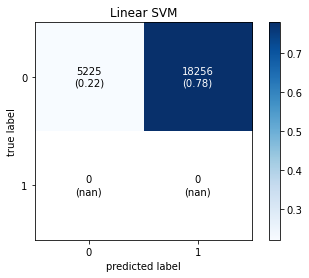

In [48]:
#####


pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(X_train, y_train)
prediction = model.predict(fakestories)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0, 1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                              colorbar=True)
plt.title("Linear SVM")
plt.show()